In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [3]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)

data_li_2013 = np.genfromtxt('enso-li2013_nino3.4_v1.txt', delimiter=",", dtype=float) # nino 3.4 reconstruction 
# To address these challenges, we compile and synthesize 2,222 tree-ring chronologies from both the tropics and 
# mid-latitudes of both hemispheres to reconstruct ENSO variability for the past seven centuries.


The multi-taper method14 spectral analysis reveals that significant ENSO periodicities fall within interannual (2–7 years) and decadal (8–13 years) bands 
 Before the SEA, the reconstructed Niño3.4 SSTs were processed using a 9-yr high-pass filter to isolate interannual variability. 

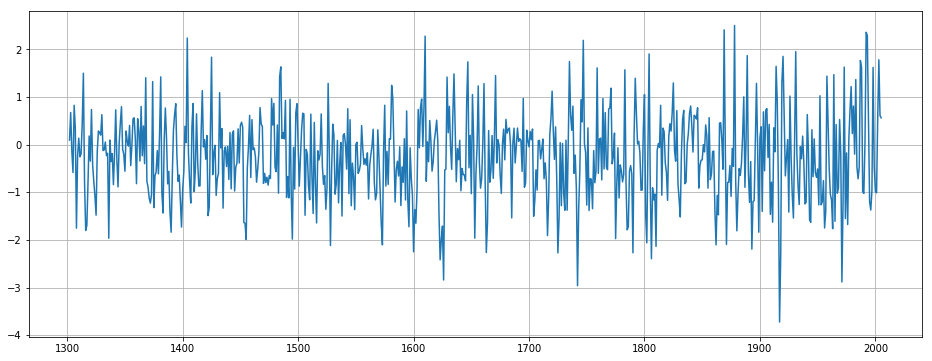

In [5]:
year_li_2013 = data_li_2013[:,0]
nino3_li_2013 = data_li_2013[:,1]
plt.figure(figsize=(16,6))
plt.plot(data_li_2013[:,0], data_li_2013[:,1])
plt.grid()
#print(year_li_2013)

In [6]:
from scipy.signal import butter, lfilter

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, cutoff, btype='high', analog=False)
    return b, a


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

0.8496626821347035


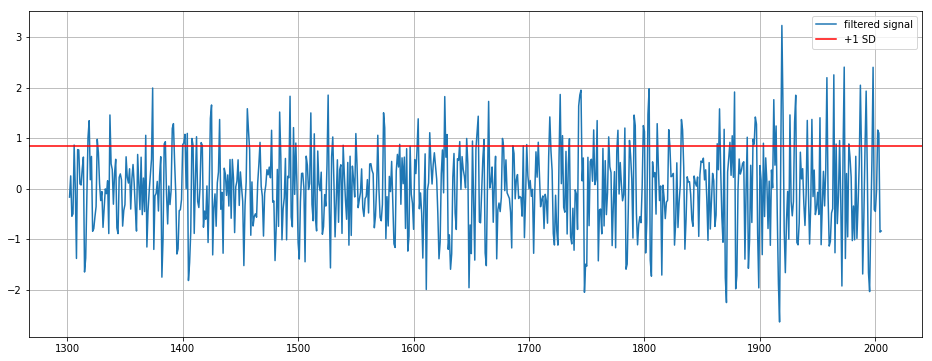

In [9]:
fs = 1 # 120 data points collected per 10 years
cutoff = 1/9
nino3_li_2013_filt = butter_highpass_filter(nino3_li_2013, cutoff, fs, order=4)
plt.figure(figsize=(16,6))
plt.plot(year_li_2013, nino3_li_2013_filt, label='filtered signal')
plt.axhline(y=np.std(nino3_li_2013_filt), color='r', linestyle='-', label='+1 SD')
plt.grid()
plt.legend()
print(np.std(nino3_li_2013_filt))

In [10]:
event_en_li = np.zeros((year_li_2013.shape[0]))
event_en_li[nino3_li_2013_filt>=np.std(nino3_li_2013_filt)] = 1.0

In [11]:
event_yy_volc_all = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong = np.zeros((year_li_2013.shape[0]))
event_yy_volc_all_trop = np.zeros((year_li_2013.shape[0]))
event_yy_volc_all_nh = np.zeros((year_li_2013.shape[0]))
event_yy_volc_all_sh = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong_trop = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong_nh = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong_sh = np.zeros((year_li_2013.shape[0]))

In [ ]:
for i in range(year_li_2013.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == year_li_2013[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=3.7:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0